<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
from imports import *
from analysis import *

In [2]:
dat = read_organize_data('C:\\Users\\Andy\\OneDrive\\20_categories_training')

In [3]:
drop = []
for i, pict in enumerate(dat.Pictures):
    if len(pict.shape) != 3:
        drop.append(i)
        
dat = dat.drop(dat.index[drop])

### Features Extraction

Here we start by computing basic statistics on the images at hand and we estimate the influence it has on our objective.

In [4]:
dat['mean_red'] = pd.Series([np.mean(pict[:,:,0]) for pict in dat.Pictures])
dat['mean_green'] = pd.Series([np.mean(pict[:,:,1]) for pict in dat.Pictures])
dat['mean_blue'] = pd.Series([np.mean(pict[:,:,2]) for pict in dat.Pictures])
dat['std_red'] = pd.Series([np.std(pict[:,:,0]) for pict in dat.Pictures])
dat['std_green'] = pd.Series([np.std(pict[:,:,1]) for pict in dat.Pictures])
dat['std_blue'] = pd.Series([np.std(pict[:,:,2]) for pict in dat.Pictures])
dat['1q_red'] = pd.Series([np.percentile(pict[:,:,0], 25) for pict in dat.Pictures])
dat['1q_green'] = pd.Series([np.percentile(pict[:,:,1], 25) for pict in dat.Pictures])
dat['1q_blue'] = pd.Series([np.percentile(pict[:,:,2], 25) for pict in dat.Pictures])
dat['3q_red'] = pd.Series([np.percentile(pict[:,:,0], 75) for pict in dat.Pictures])
dat['3q_green'] = pd.Series([np.percentile(pict[:,:,1], 75) for pict in dat.Pictures])
dat['3q_blue'] = pd.Series([np.percentile(pict[:,:,2], 75) for pict in dat.Pictures])

We label encode our target feature in order to visualize the correlation with the features we just created.

In [5]:
enc_to_int = dict((zip(dat.Encoding.unique(), range(dat.Encoding.unique().shape[0]))))
dat['enc_le'] = dat['Encoding'].apply(lambda x: enc_to_int[x])

One talkative visualization that we can perform was to confront all the features we just created. All the features can then be compared and correlated (Pearson coefficient of linear correlation), giving us such matrix. 

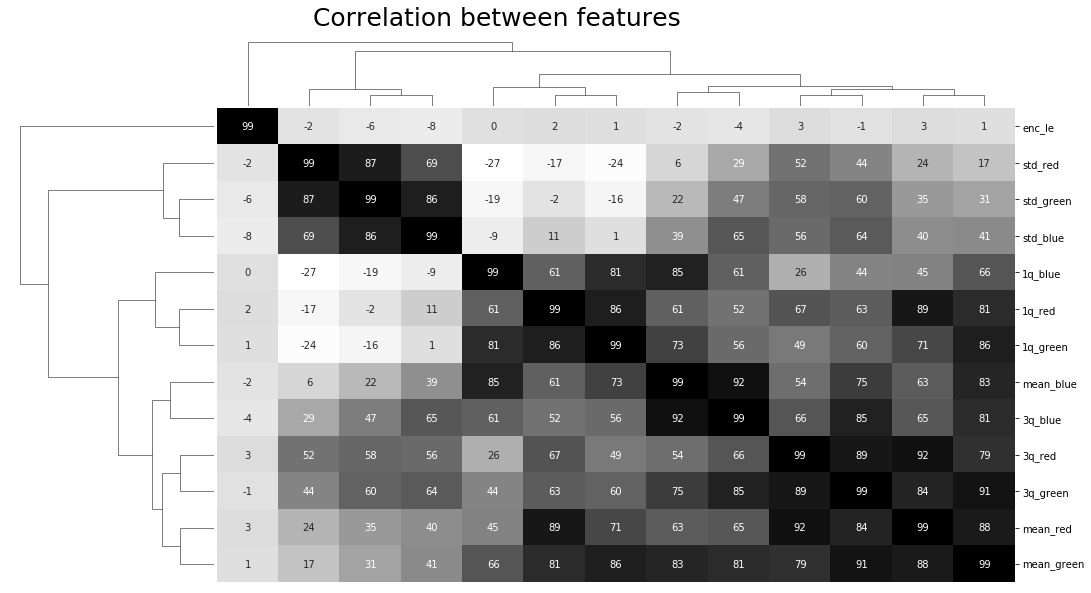

In [6]:
cor = dat[['mean_red', 'mean_green', 'mean_blue', 'std_red', 'std_green', 'std_blue', '1q_red', '1q_blue', '1q_green', '3q_red', '3q_blue', '3q_green', 'enc_le']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

In [7]:
dat = dat.dropna()

Text(0,0.5,'Mean value for green')

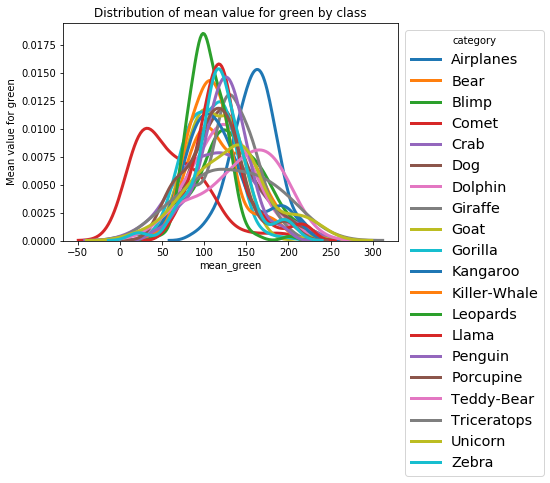

In [8]:
objects = ['Airplanes', 'Bear', 'Blimp', 'Comet', 'Crab', 'Dog', 'Dolphin', 'Giraffe',\
               'Goat', 'Gorilla', 'Kangaroo', 'Killer-Whale', 'Leopards', 'Llama', 'Penguin',\
               'Porcupine', 'Teddy-Bear', 'Triceratops', 'Unicorn', 'Zebra']

for element in objects:

    # Draw the density plot
    sns.distplot(dat[dat.Encoding==element]['mean_green'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = element)    

# Plot formatting
plt.legend(title='category', fontsize='x-large', bbox_to_anchor=(1, 1));
plt.title('Distribution of mean value for green by class')
plt.ylabel('Mean value for green')

Here, we are using KAZE descriptor to detect keypoints on images.

In [9]:
dat = dat.reset_index(drop=True)

In [10]:
ser = []
for i in range(dat.shape[0]):
    if i%100 == 0:
        print(i)
    try:
        ser.append(extract_features(dat.loc[i, 'Pictures'], vector_size=32))
    except:
        ser.append(np.nan)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [11]:
dat['keypoints'] = pd.Series(ser)

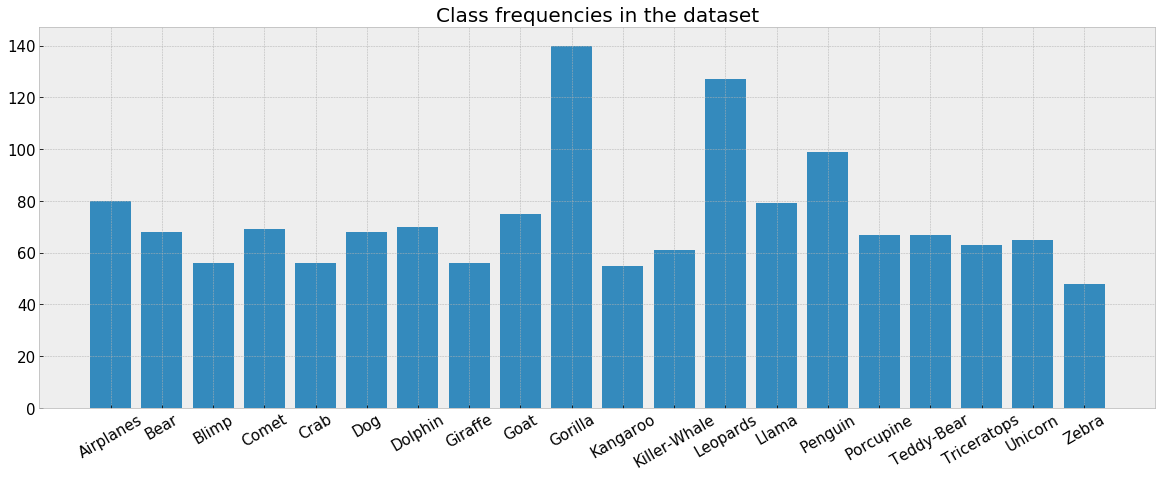

In [12]:
grouped = dat.groupby('Encoding').count()
with plt.style.context('bmh'):
    plt.figure(figsize=(20,7))
    plt.bar(grouped.index, grouped.Pictures)
    plt.xticks(size=15, rotation=30)
    plt.yticks(size=15)
    plt.title('Class frequencies in the dataset', size=20)

In [13]:
height = []
width = []
for i in range(dat.shape[0]):
    if i%100==0:
        print(i)
    img = dat.loc[i, 'Pictures']
    height.append(img.shape[0])
    width.append(img.shape[1])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [14]:
dat['height'] = pd.Series(height)
dat['width'] = pd.Series(width)

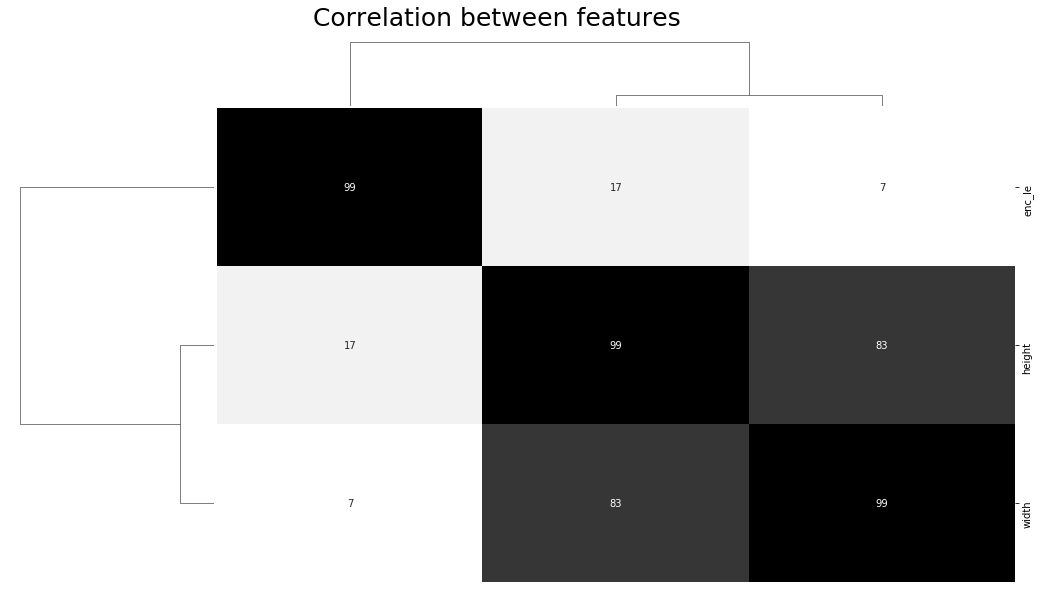

In [15]:
cor = dat[['height', 'width', 'enc_le']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

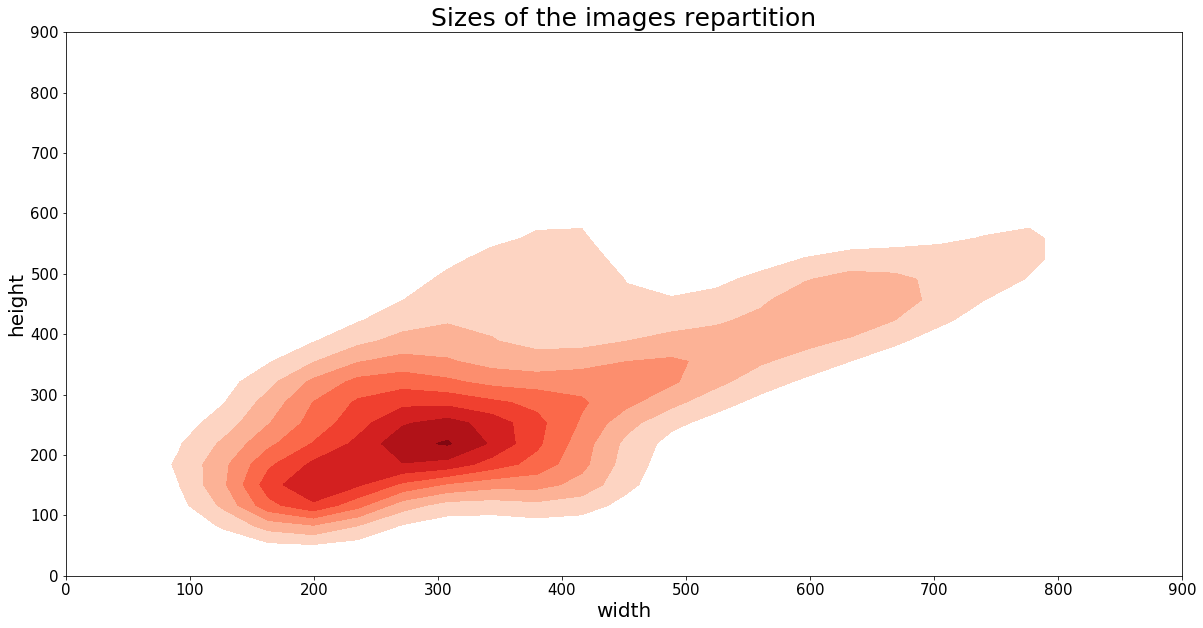

In [16]:
plt.figure(figsize=(20,10))
plt.xlim(right=900)
plt.ylim(top=900)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('width', size=20)
plt.ylabel('height', size=20)
plt.title('Sizes of the images repartition', size=25)
sns.kdeplot(dat.width, dat.height, cmap="Reds", shade=True, shade_lowest=False)

In [17]:
dat.head(1)

,Pictures,Encoding,mean_red,mean_green,mean_blue,std_red,std_green,std_blue,1q_red,1q_green,1q_blue,3q_red,3q_green,3q_blue,enc_le,keypoints,height,width
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",Airplanes,183.355727,176.750337,149.151581,56.40665,64.039966,79.648356,149.0,136.0,82.0,216.0,226.0,217.0,0,"[0.021362966, -0.002048886, 0.021362966, 0.002...",164,398


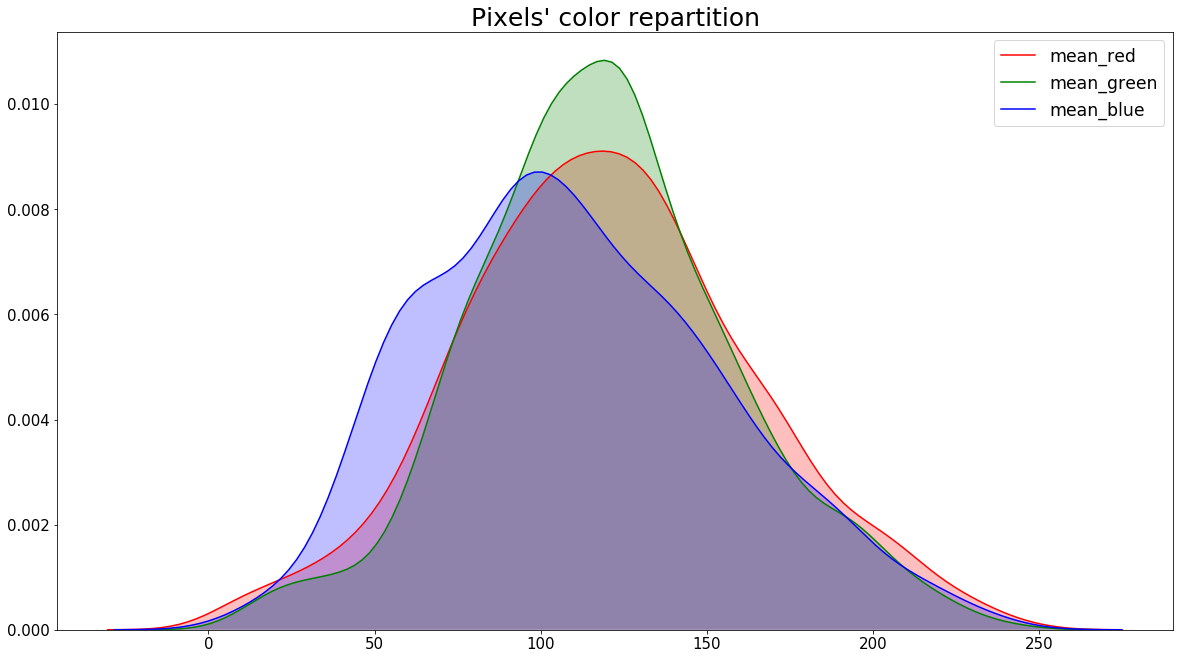

In [18]:
plt.figure(figsize=(20,11))
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Pixels' color repartition", size=25)
sns.kdeplot(dat.mean_red, shade=True, color="r")
sns.kdeplot(dat.mean_green, shade=True, color="green")
sns.kdeplot(dat.mean_blue, shade=True, color="blue")
plt.legend(fontsize='xx-large')

In [19]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector()

img = dat.loc[0, 'Pictures'][:,:,0]

sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()

orb = cv2.ORB_create(nfeatures=1500)

keypoints, descriptors = orb.detectAndCompute(img, None)

In [20]:
descriptors

array([[124, 188, 244, ..., 233, 195, 146],
       [ 70,  63, 174, ..., 110, 181, 211],
       [218, 163, 238, ...,  36, 183, 195],
       ...,
       [ 70, 144, 186, ...,  69,  45,  87],
       [ 14, 241,  38, ...,  31, 189, 215],
       [ 46, 115, 224, ..., 126, 127, 215]], dtype=uint8)

In [21]:
dat['mean_keypoints'] = pd.Series([np.mean(dat.loc[i, 'keypoints']) for i in range(dat.shape[0])])
dat['std_keypoints'] = pd.Series([np.std(dat.loc[i, 'keypoints']) for i in range(dat.shape[0])])
dat['aspect_ratio'] = dat.width/dat.height

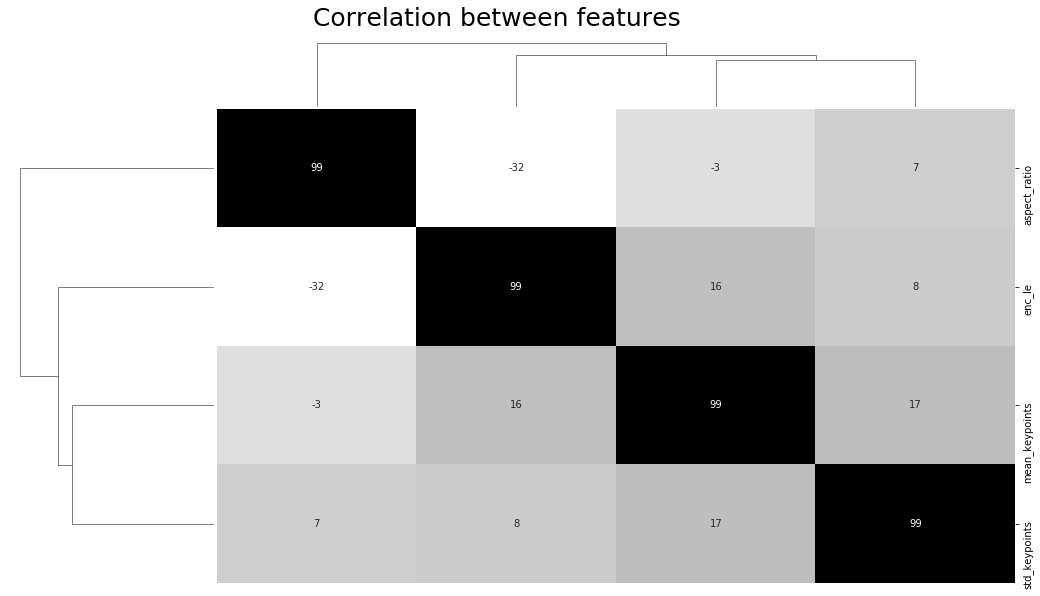

In [22]:
cor = dat[['mean_keypoints', 'std_keypoints', 'aspect_ratio', 'enc_le']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

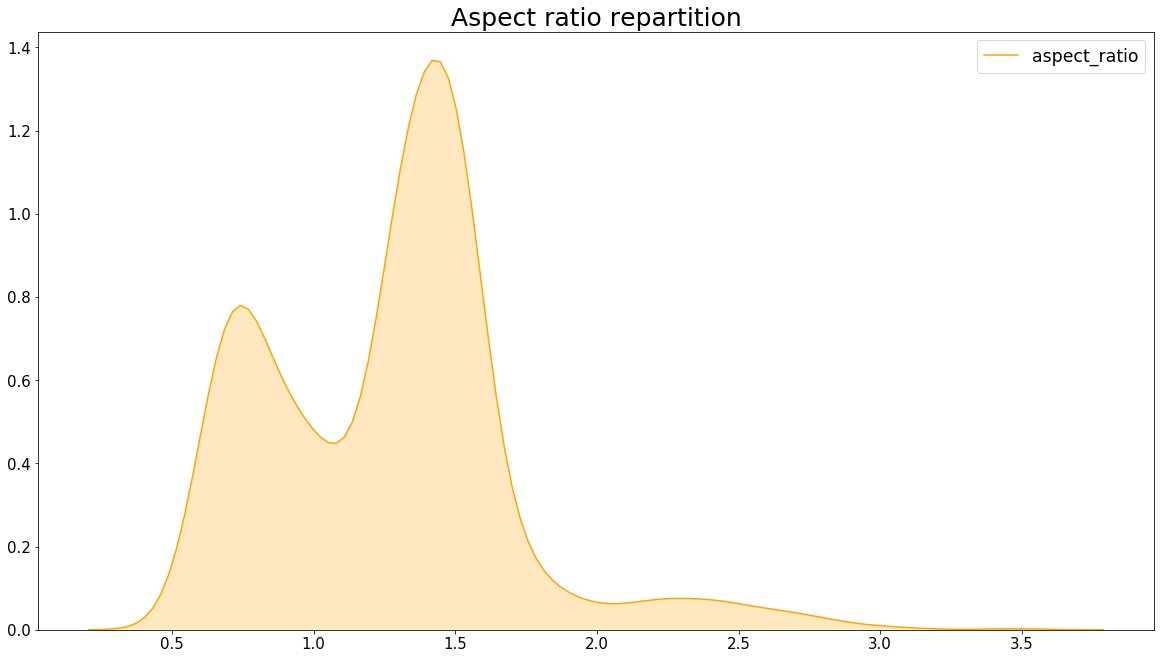

In [23]:
plt.figure(figsize=(20,11))
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Aspect ratio repartition", size=25)
sns.kdeplot(dat.aspect_ratio, shade=True, color="orange")
plt.legend(fontsize='xx-large')

In [24]:
dat.columns

Index(['Pictures', 'Encoding', 'mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', '1q_red', '1q_green', '1q_blue',
       '3q_red', '3q_green', '3q_blue', 'enc_le', 'keypoints', 'height',
       'width', 'mean_keypoints', 'std_keypoints', 'aspect_ratio'],
      dtype='object')

In [25]:
anx = dat[[ 'mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', 'height',
       'width', '1q_red', '1q_green', '1q_blue', '3q_red', '3q_green',
       '3q_blue', 'mean_keypoints', 'std_keypoints', 'aspect_ratio']]

anx_le = dat[[ 'mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', 'height',
       'width', '1q_red', '1q_green', '1q_blue', '3q_red', '3q_green',
       '3q_blue', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'enc_le']]

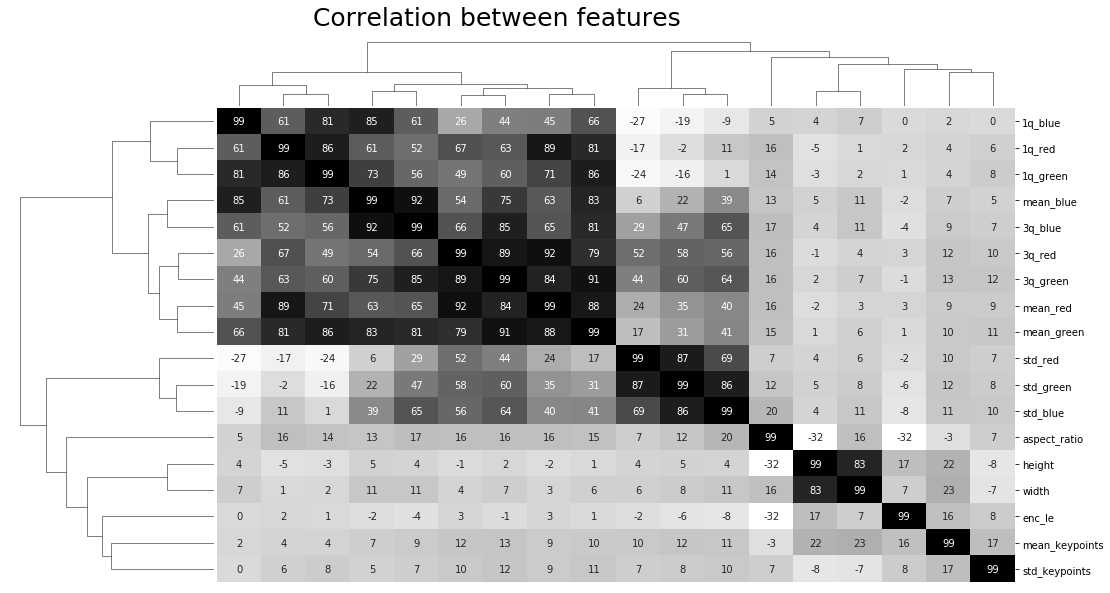

In [26]:
cor = anx_le.corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

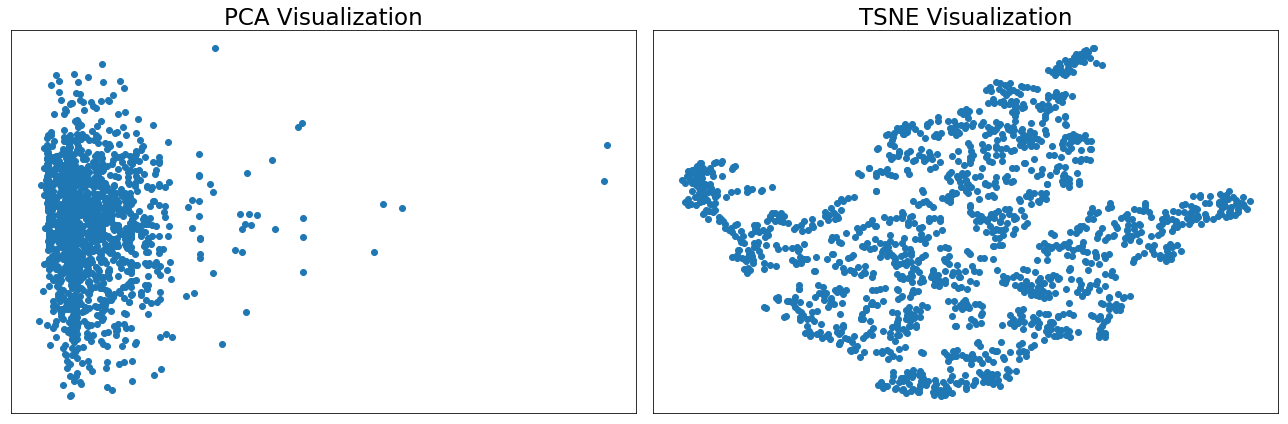

In [27]:
get_pca_tsne(anx.dropna())

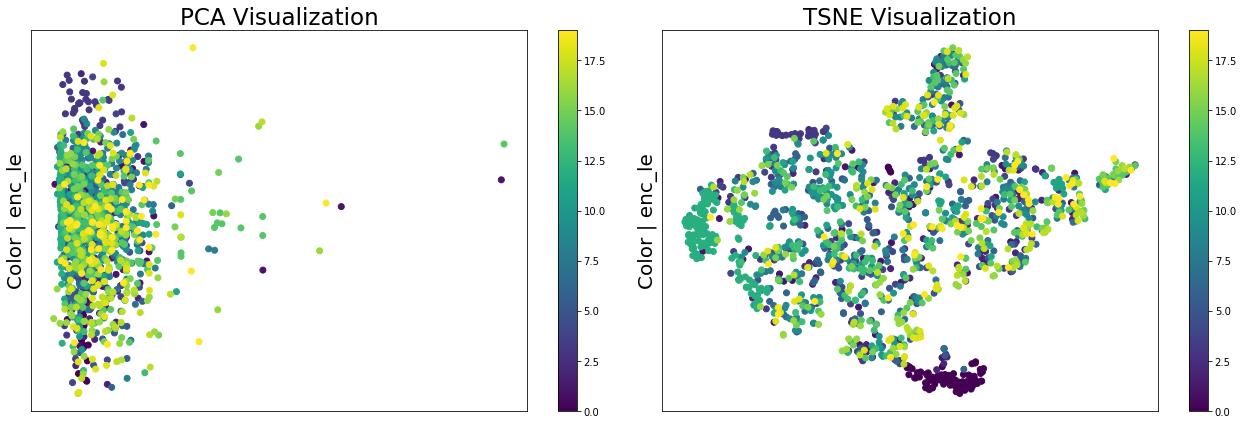

In [28]:
get_pca_tsne2(anx_le.dropna(), metric='enc_le')

In [30]:
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
img1 = dat.loc[0, 'Pictures'][:,:,0]
edges_x1 = cv2.filter2D(img1,cv2.CV_8U,kernelx)
edges_y1 = cv2.filter2D(img1,cv2.CV_8U,kernely)

In [31]:
img2 = dat.loc[0, 'Pictures'][:,:,1]
img3 = dat.loc[0, 'Pictures'][:,:,2]
edges_x2 = cv2.filter2D(img2,cv2.CV_8U,kernelx)
edges_y2 = cv2.filter2D(img2,cv2.CV_8U,kernely)

In [32]:
edges_x3 = cv2.filter2D(img3,cv2.CV_8U,kernelx)
edges_y3 = cv2.filter2D(img3,cv2.CV_8U,kernely)

In [33]:
edges_xm = np.maximum(edges_x1, edges_x2, edges_x3)
edges_ym = np.maximum(edges_y1, edges_y2, edges_y3)

In [34]:
cv2.imshow('Gradients_X',edges_xm)
cv2.imshow('Gradients_Y',edges_ym)
cv2.waitKey(0)

-1

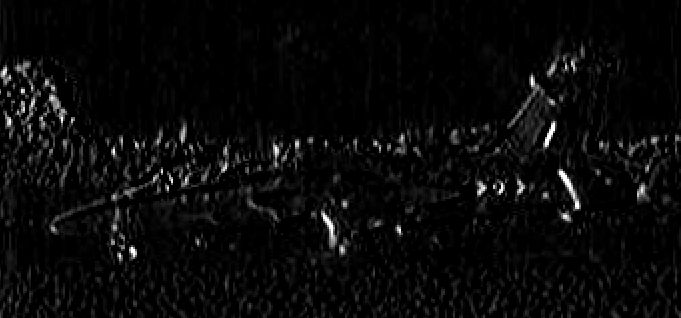

In [36]:
from IPython.display import Image
Image(filename='gradient_x.png')

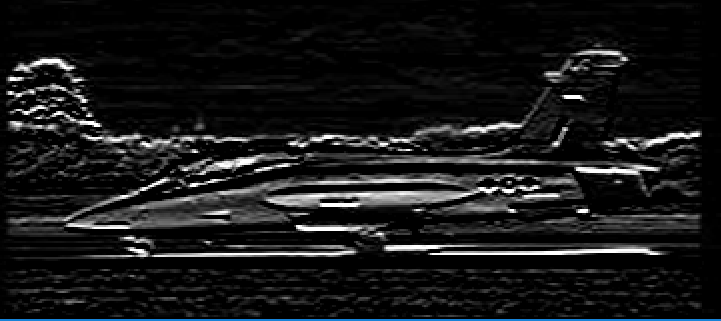

In [37]:
Image(filename='gradient_y.png')

We compute the gradient matrix regarding the x-axis and the y-axis

In [38]:
dat = dat.reset_index(drop=True)

In [39]:
edges_x = []
edges_y = []
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
for i in range(dat.shape[0]):
    if i%100==0:
        print(i)
    img1 = dat.loc[i, 'Pictures'][:,:,0]
    edges_x1 = (cv2.filter2D(img1,cv2.CV_8U,kernelx))
    edges_y1 = (cv2.filter2D(img1,cv2.CV_8U,kernely))
    img2 = dat.loc[i, 'Pictures'][:,:,1]
    edges_x2 = (cv2.filter2D(img2,cv2.CV_8U,kernelx))
    edges_y2 = (cv2.filter2D(img2,cv2.CV_8U,kernely))
    img3 = dat.loc[i, 'Pictures'][:,:,2]
    edges_x3 = (cv2.filter2D(img3,cv2.CV_8U,kernelx))
    edges_y3 = (cv2.filter2D(img3,cv2.CV_8U,kernely))
    edges_x.append(np.maximum(edges_x1, edges_x2, edges_x3))
    edges_y.append(np.maximum(edges_y1, edges_y2, edges_y3))  

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [40]:
dat['edges_x'] = edges_x
dat['edges_y'] = edges_y

In [41]:
dat['svd_r']=dat['Pictures'].apply(svd_rgb)
dat['svd_g']=dat['Pictures'].apply(svd_rgb2)
dat['svd_b']=dat['Pictures'].apply(svd_rgb3)

In [42]:
dat['prop_blue']=dat['Pictures'].apply(count_blue)

In [43]:
dat.columns

Index(['Pictures', 'Encoding', 'mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', '1q_red', '1q_green', '1q_blue',
       '3q_red', '3q_green', '3q_blue', 'enc_le', 'keypoints', 'height',
       'width', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'edges_x',
       'edges_y', 'svd_r', 'svd_g', 'svd_b', 'prop_blue'],
      dtype='object')

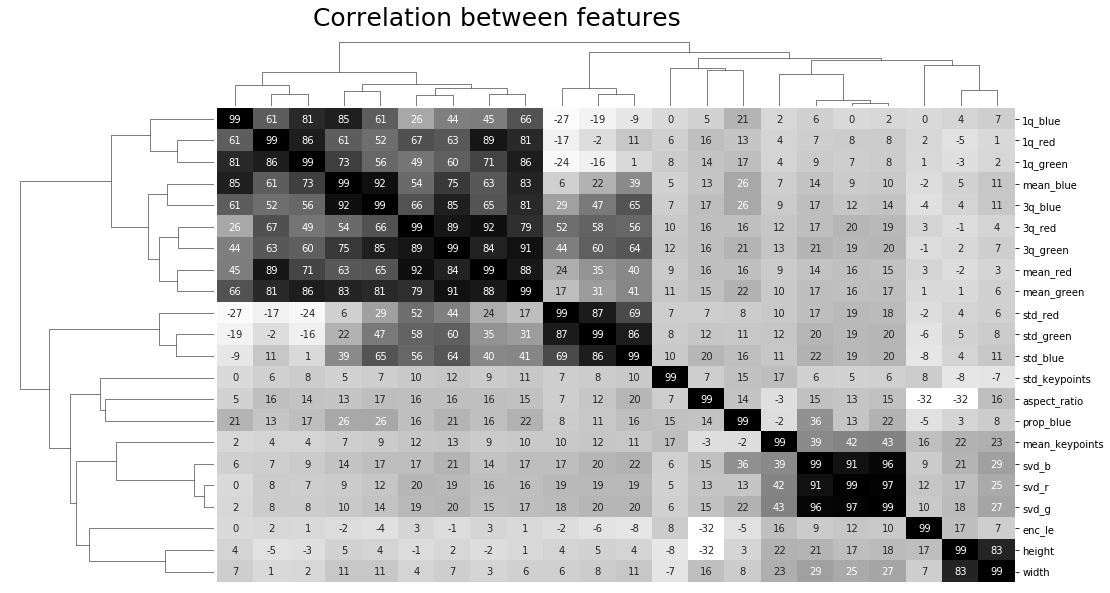

In [44]:
cor = dat[['mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', '1q_red', '1q_green', '1q_blue',
       '3q_red', '3q_green', '3q_blue', 'enc_le', 'height',
       'width', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'svd_r', 'svd_g', 'svd_b', 'prop_blue']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

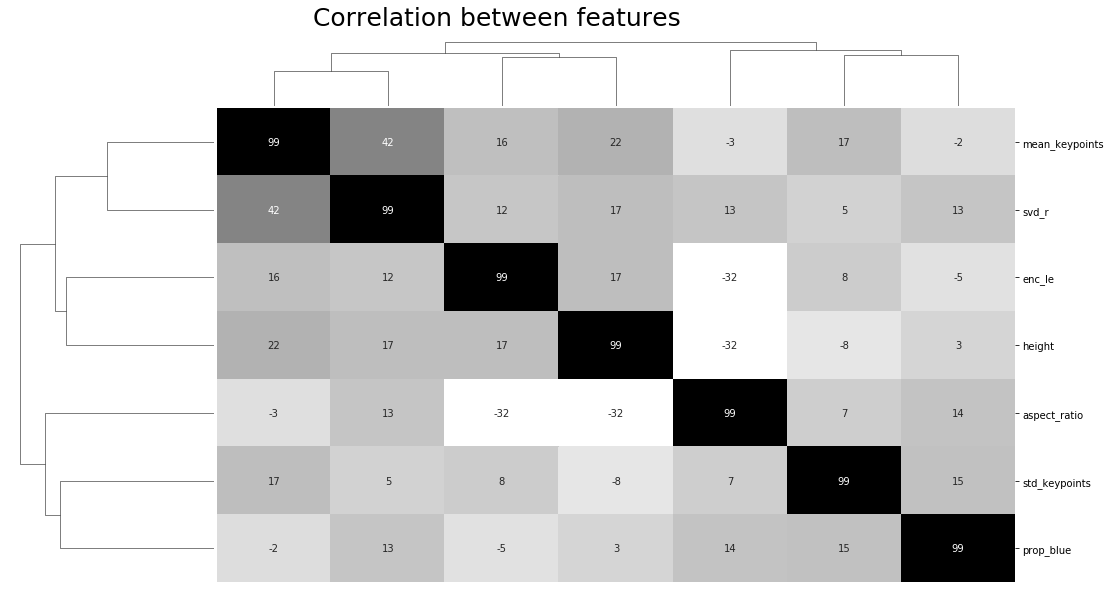

In [45]:
cor = dat[['enc_le', 'height', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'svd_r','prop_blue']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

In [46]:
anx = dat.loc[1, 'edges_x']
anx.shape

(184, 401)

In [47]:
sum_upper_left = []
sum_upper_right = []
sum_lower_left = []
sum_lower_right = []
avg_upper_left = []
avg_upper_right = []
avg_lower_left = []
avg_lower_right = []
for i in range(dat.shape[0]):
    anx = dat.loc[i, 'edges_x']
    height, weight = anx.shape[0], anx.shape[1]
    sum_upper_left.append(np.sum(anx[height//2:,:weight//2]))
    sum_upper_right.append(np.sum(anx[height//2:,weight//2:]))
    sum_lower_left.append(np.sum(anx[:height//2,:weight//2]))
    sum_lower_right.append(np.sum(anx[:height//2:,weight//2:]))
    avg_upper_left.append(np.sum(anx[height//2:,:weight//2])/np.count_nonzero(anx[height//2:,:weight//2]))
    avg_upper_right.append(np.sum(anx[height//2:,weight//2:])/np.count_nonzero(anx[height//2:,weight//2:]))
    avg_lower_left.append(np.sum(anx[:height//2,:weight//2])/np.count_nonzero(anx[:height//2,:weight//2]))
    avg_lower_right.append(np.sum(anx[:height//2:,weight//2:])/np.count_nonzero(anx[:height//2:,weight//2:]))    

In [48]:
dat['sum_upper_left'] = sum_upper_left
dat['sum_upper_right'] = sum_upper_right
dat['sum_lower_left'] = sum_lower_left
dat['sum_lower_right'] = sum_lower_right
dat['avg_upper_left'] = avg_upper_left
dat['avg_upper_right'] = avg_upper_right
dat['avg_lower_left'] = avg_lower_left
dat['avg_lower_right'] = avg_lower_right

In [49]:
dat.columns

Index(['Pictures', 'Encoding', 'mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', '1q_red', '1q_green', '1q_blue',
       '3q_red', '3q_green', '3q_blue', 'enc_le', 'keypoints', 'height',
       'width', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'edges_x',
       'edges_y', 'svd_r', 'svd_g', 'svd_b', 'prop_blue', 'sum_upper_left',
       'sum_upper_right', 'sum_lower_left', 'sum_lower_right',
       'avg_upper_left', 'avg_upper_right', 'avg_lower_left',
       'avg_lower_right'],
      dtype='object')

In [50]:
def get_blurrness_score(image):
    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    return fm

dat['blurrness'] = dat['Pictures'].apply(get_blurrness_score)

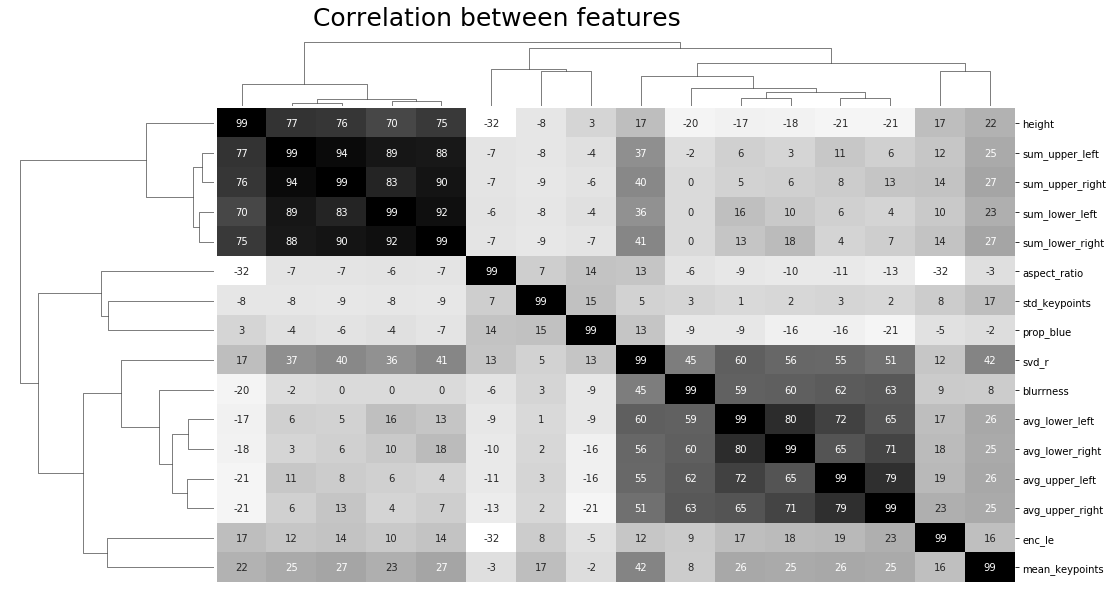

In [51]:
cor = dat[['enc_le', 'height', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'svd_r','prop_blue', 'sum_upper_left',
       'sum_upper_right', 'sum_lower_left', 'sum_lower_right',
       'avg_upper_left', 'avg_upper_right', 'avg_lower_left',
       'avg_lower_right', 'blurrness']].corr()
cor = pd.DataFrame(np.round(cor.values*100).astype('int').clip(max=99), columns=cor.columns, index=cor.index)
cmp = sns.clustermap(cor, cmap='Greys', annot=True, figsize=(18,10))
_ = cmp.fig.suptitle('Correlation between features', y=0.925, size=25) 
_ = cmp.cax.set_visible(False)
_ = cmp.ax_heatmap.set_xticks([])

In [52]:
dat.columns

Index(['Pictures', 'Encoding', 'mean_red', 'mean_green', 'mean_blue',
       'std_red', 'std_green', 'std_blue', '1q_red', '1q_green', '1q_blue',
       '3q_red', '3q_green', '3q_blue', 'enc_le', 'keypoints', 'height',
       'width', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'edges_x',
       'edges_y', 'svd_r', 'svd_g', 'svd_b', 'prop_blue', 'sum_upper_left',
       'sum_upper_right', 'sum_lower_left', 'sum_lower_right',
       'avg_upper_left', 'avg_upper_right', 'avg_lower_left',
       'avg_lower_right', 'blurrness'],
      dtype='object')

In [53]:
data = dat[[ 'enc_le', 'keypoints', 'height',
       'width', 'mean_keypoints', 'std_keypoints', 'aspect_ratio', 'edges_x',
       'edges_y', 'svd_r', 'svd_g', 'svd_b', 'prop_blue', 'sum_upper_left',
       'sum_upper_right', 'sum_lower_left', 'sum_lower_right',
       'avg_upper_left', 'avg_upper_right', 'avg_lower_left',
       'avg_lower_right', 'blurrness']]

In [54]:
data.to_csv('input_dat.csv', index=True)